# Basic AutoEncoder with RNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [ ]:
class RNNAutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNAutoEncoder, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.decoder = nn.RNN(hidden_size, input_size, num_layers, batch_first=True)

    def forward(self, x):
        # 인코딩 단계
        encoded, hidden = self.rnn(x)
        # 디코딩 단계
        decoded, _ = self.decoder(encoded)
        return decoded

In [ ]:
# 예제 데이터 생성
np.random.seed(0)
data = np.random.rand(1000, 10, 5)  # (샘플 수, 시퀀스 길이, 특성 수)
data_tensor = torch.Tensor(data)

# DataLoader 준비
dataset = TensorDataset(data_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
# 하이퍼파라미터 설정
input_size = 5
hidden_size = 10
num_layers = 2
num_epochs = 50
learning_rate = 0.001

# 모델, 손실 함수 및 옵티마이저 초기화
model = RNNAutoEncoder(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 훈련 루프
for epoch in range(num_epochs):
    for batch in dataloader:
        inputs = batch[0]

        # 순전파
        outputs = model(inputs)
        loss = criterion(outputs, inputs)  # 입력과 출력의 차이를 계산

        # 역전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 0.1328
Epoch [2/50], Loss: 0.0907
Epoch [3/50], Loss: 0.0888
Epoch [4/50], Loss: 0.0810
Epoch [5/50], Loss: 0.0745
Epoch [6/50], Loss: 0.0761
Epoch [7/50], Loss: 0.0754
Epoch [8/50], Loss: 0.0622
Epoch [9/50], Loss: 0.0608
Epoch [10/50], Loss: 0.0484
Epoch [11/50], Loss: 0.0490
Epoch [12/50], Loss: 0.0443
Epoch [13/50], Loss: 0.0426
Epoch [14/50], Loss: 0.0324
Epoch [15/50], Loss: 0.0365
Epoch [16/50], Loss: 0.0309
Epoch [17/50], Loss: 0.0314
Epoch [18/50], Loss: 0.0240
Epoch [19/50], Loss: 0.0237
Epoch [20/50], Loss: 0.0220
Epoch [21/50], Loss: 0.0233
Epoch [22/50], Loss: 0.0222
Epoch [23/50], Loss: 0.0210
Epoch [24/50], Loss: 0.0203
Epoch [25/50], Loss: 0.0209
Epoch [26/50], Loss: 0.0191
Epoch [27/50], Loss: 0.0194
Epoch [28/50], Loss: 0.0177
Epoch [29/50], Loss: 0.0216
Epoch [30/50], Loss: 0.0183
Epoch [31/50], Loss: 0.0223
Epoch [32/50], Loss: 0.0217
Epoch [33/50], Loss: 0.0183
Epoch [34/50], Loss: 0.0204
Epoch [35/50], Loss: 0.0221
Epoch [36/50], Loss: 0.0220
E

In [ ]:
# 테스트 데이터 생성 및 평가
test_data = np.random.rand(10, 10, 5)  # (샘플 수, 시퀀스 길이, 특성 수)
test_tensor = torch.Tensor(test_data)

with torch.no_grad():
    reconstructed = model(test_tensor)
    print("원본 데이터:", test_tensor)
    print("복원된 데이터:", reconstructed)

원본 데이터: tensor([[[0.3076, 0.0620, 0.9888, 0.7191, 0.7576],
         [0.2638, 0.8142, 0.5690, 0.4594, 0.1307],
         [0.3182, 0.3471, 0.0494, 0.9638, 0.9648],
         [0.1107, 0.3393, 0.5634, 0.4868, 0.5649],
         [0.8611, 0.8154, 0.4101, 0.5231, 0.1886],
         [0.4560, 0.7625, 0.2534, 0.2458, 0.9968],
         [0.2260, 0.9625, 0.2486, 0.7130, 0.0449],
         [0.6737, 0.4164, 0.5137, 0.5106, 0.3799],
         [0.0179, 0.8077, 0.4125, 0.2848, 0.8954],
         [0.5160, 0.9834, 0.4560, 0.7113, 0.0900]],

        [[0.4329, 0.4448, 0.0092, 0.7657, 0.7630],
         [0.2543, 0.9701, 0.8001, 0.6262, 0.1462],
         [0.4076, 0.1476, 0.1996, 0.2464, 0.3346],
         [0.5140, 0.7737, 0.6859, 0.2200, 0.0537],
         [0.2334, 0.0739, 0.7952, 0.0686, 0.7394],
         [0.7234, 0.3311, 0.6527, 0.5067, 0.9823],
         [0.3808, 0.9347, 0.2893, 0.3829, 0.5016],
         [0.6593, 0.2037, 0.9808, 0.9649, 0.6366],
         [0.4497, 0.5322, 0.6306, 0.6492, 0.9031],
         [0.6485, 0.9

Mean Squared Error between original and reconstructed data: 0.0047


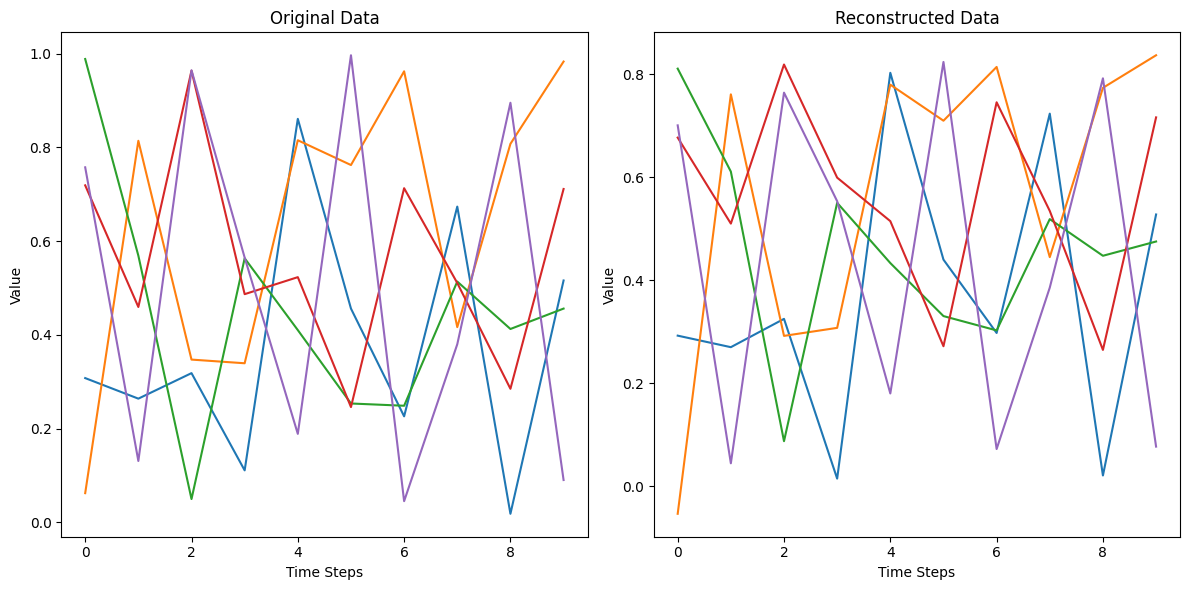

In [ ]:
import matplotlib.pyplot as plt

# 원본 데이터와 복원된 데이터의 차이 계산
def calculate_mse(original, reconstructed):
    return ((original - reconstructed) ** 2).mean()

# MSE 계산
mse = calculate_mse(test_tensor, reconstructed)
print(f'Mean Squared Error between original and reconstructed data: {mse:.4f}')

# 데이터 시각화
def plot_data(original, reconstructed, index=0):
    plt.figure(figsize=(12, 6))

    # 원본 데이터
    plt.subplot(1, 2, 1)
    plt.title("Original Data")
    plt.plot(original[index].numpy())
    plt.xlabel("Time Steps")
    plt.ylabel("Value")

    # 복원된 데이터
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Data")
    plt.plot(reconstructed[index].numpy())
    plt.xlabel("Time Steps")
    plt.ylabel("Value")

    plt.tight_layout()
    plt.show()

# 시각화 예시
plot_data(test_tensor, reconstructed)


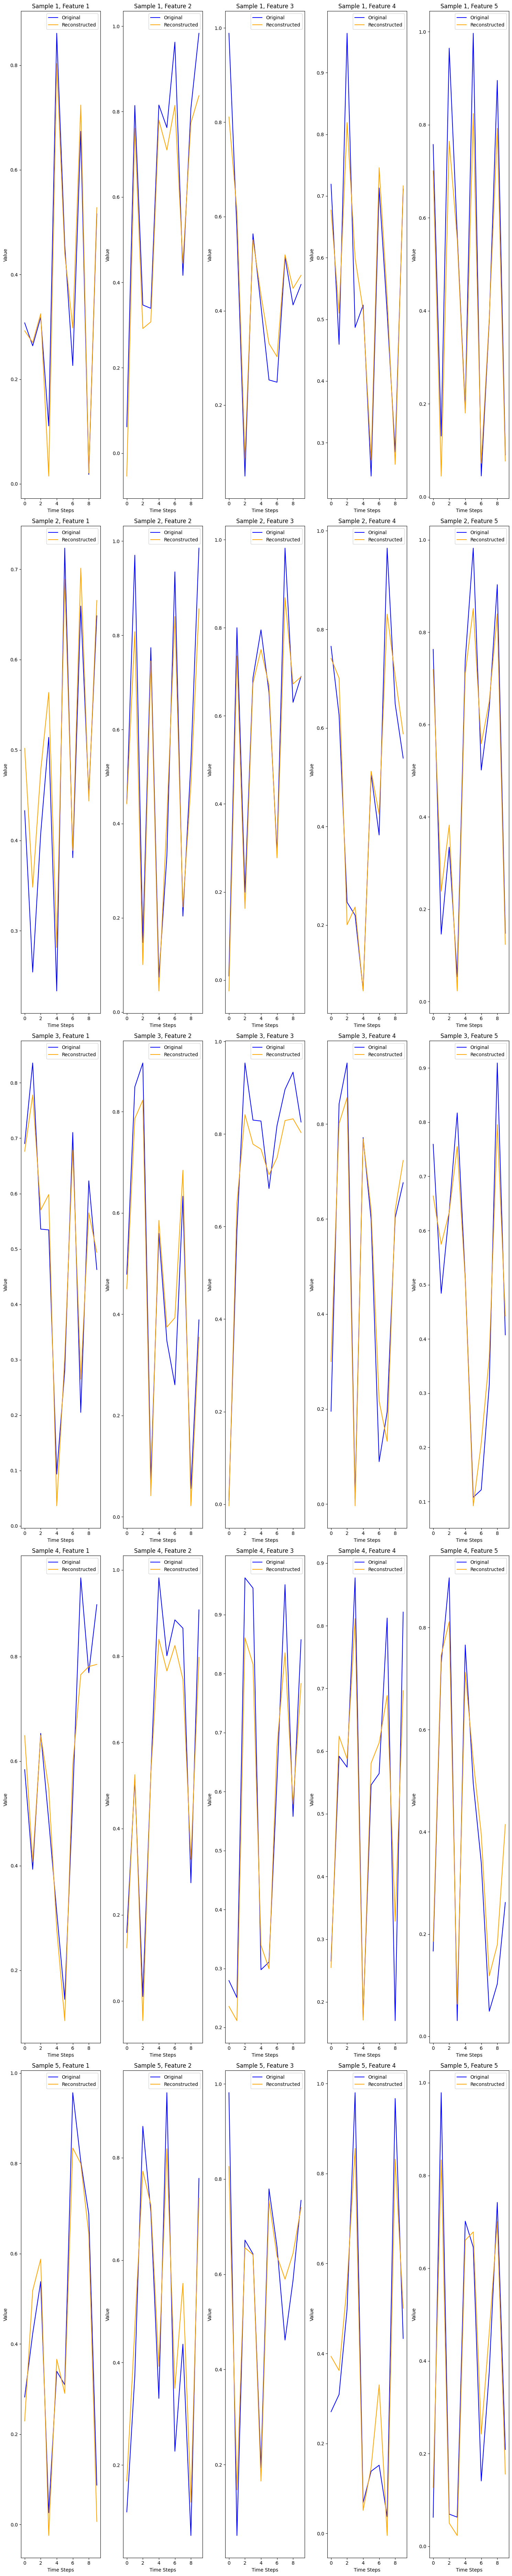

In [ ]:
def plot_features(original, reconstructed, num_samples=5):
    num_features = original.shape[2]  # 특성 수
    plt.figure(figsize=(15, 3 * num_features * num_samples))

    for sample_index in range(num_samples):
        for feature_index in range(num_features):
            plt.subplot(num_samples, num_features, sample_index * num_features + feature_index + 1)
            plt.plot(original[sample_index, :, feature_index].numpy(), label='Original', color='blue')
            plt.plot(reconstructed[sample_index, :, feature_index].numpy(), label='Reconstructed', color='orange')
            plt.title(f"Sample {sample_index + 1}, Feature {feature_index + 1}")
            plt.xlabel("Time Steps")
            plt.ylabel("Value")
            plt.legend()

    plt.tight_layout()
    plt.show()

# 시각화 예시: 처음 5개의 샘플의 각 특성을 비교
plot_features(test_tensor, reconstructed, num_samples=5)

# Custom AutoEncoder with Custom RNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [ ]:
class CustomRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(CustomRNNCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.W_xh = nn.Parameter(torch.randn(hidden_size, input_size))  # 입력 가중치
        self.W_hh = nn.Parameter(torch.randn(hidden_size, hidden_size))  # 은닉 상태 가중치
        self.b_h = nn.Parameter(torch.zeros(hidden_size))  # 편향

    def forward(self, x, hidden):
        return torch.tanh(torch.matmul(hidden, self.W_hh.t()) + torch.matmul(x, self.W_xh.t()) + self.b_h)

class CustomRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(CustomRNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn_cells = nn.ModuleList([CustomRNNCell(input_size if i == 0 else hidden_size, hidden_size) for i in range(num_layers)])

    def forward(self, x):
        batch_size, seq_length, _ = x.size()
        hidden_states = [torch.zeros(batch_size, self.hidden_size).to(x.device) for _ in range(self.num_layers)]
        outputs = []

        for t in range(seq_length):
            input_t = x[:, t, :]  # t 번째 시간 단계의 입력
            for i in range(self.num_layers):
                hidden_states[i] = self.rnn_cells[i](input_t, hidden_states[i])
                input_t = hidden_states[i]  # 다음 레이어의 입력으로 사용
            outputs.append(hidden_states[-1])  # 마지막 레이어의 은닉 상태를 출력으로 사용

        return torch.stack(outputs, dim=1)  # (batch_size, seq_length, hidden_size)

class CustomRNNAutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(CustomRNNAutoEncoder, self).__init__()
        self.encoder = CustomRNN(input_size, hidden_size, num_layers)
        self.decoder = CustomRNN(hidden_size, input_size, num_layers)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
# 예제 데이터 생성
np.random.seed(0)
data = np.random.rand(100, 100, 5)  # (샘플 수, 시퀀스 길이, 특성 수)
data_tensor = torch.Tensor(data)

# DataLoader 준비
dataset = TensorDataset(data_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [ ]:
# 하이퍼파라미터 설정
input_size = 5
hidden_size = 50
num_layers = 10
num_epochs = 1000
learning_rate = 0.01
batch_size = 256
seq_length = 100

# GPU 사용 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 초기화 및 GPU로 이동
model = CustomRNNAutoEncoder(input_size, hidden_size, num_layers).to(device)

# 손실 함수 및 옵티마이저 초기화
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 더미 데이터 생성
test_tensor = torch.randn(batch_size, seq_length, input_size).to(device)  # GPU에 맞게 데이터 이동

# 훈련 루프 (예시)
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # 순전파
    reconstructed = model(test_tensor)

    # 손실 계산
    loss = criterion(reconstructed, test_tensor)

    # 역전파 및 파라미터 업데이트
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/1000], Loss: 1.4115


KeyboardInterrupt: 

In [ ]:
# 테스트 데이터 생성 및 평가
test_data = np.random.rand(10, 10, 5)  # (샘플 수, 시퀀스 길이, 특성 수)
test_tensor = torch.Tensor(test_data)

with torch.no_grad():
    reconstructed = model(test_tensor)
    print("원본 데이터:", test_tensor)
    print("복원된 데이터:", reconstructed)

원본 데이터: tensor([[[0.3076, 0.0620, 0.9888, 0.7191, 0.7576],
         [0.2638, 0.8142, 0.5690, 0.4594, 0.1307],
         [0.3182, 0.3471, 0.0494, 0.9638, 0.9648],
         [0.1107, 0.3393, 0.5634, 0.4868, 0.5649],
         [0.8611, 0.8154, 0.4101, 0.5231, 0.1886],
         [0.4560, 0.7625, 0.2534, 0.2458, 0.9968],
         [0.2260, 0.9625, 0.2486, 0.7130, 0.0449],
         [0.6737, 0.4164, 0.5137, 0.5106, 0.3799],
         [0.0179, 0.8077, 0.4125, 0.2848, 0.8954],
         [0.5160, 0.9834, 0.4560, 0.7113, 0.0900]],

        [[0.4329, 0.4448, 0.0092, 0.7657, 0.7630],
         [0.2543, 0.9701, 0.8001, 0.6262, 0.1462],
         [0.4076, 0.1476, 0.1996, 0.2464, 0.3346],
         [0.5140, 0.7737, 0.6859, 0.2200, 0.0537],
         [0.2334, 0.0739, 0.7952, 0.0686, 0.7394],
         [0.7234, 0.3311, 0.6527, 0.5067, 0.9823],
         [0.3808, 0.9347, 0.2893, 0.3829, 0.5016],
         [0.6593, 0.2037, 0.9808, 0.9649, 0.6366],
         [0.4497, 0.5322, 0.6306, 0.6492, 0.9031],
         [0.6485, 0.9

Mean Squared Error between original and reconstructed data: 0.1146


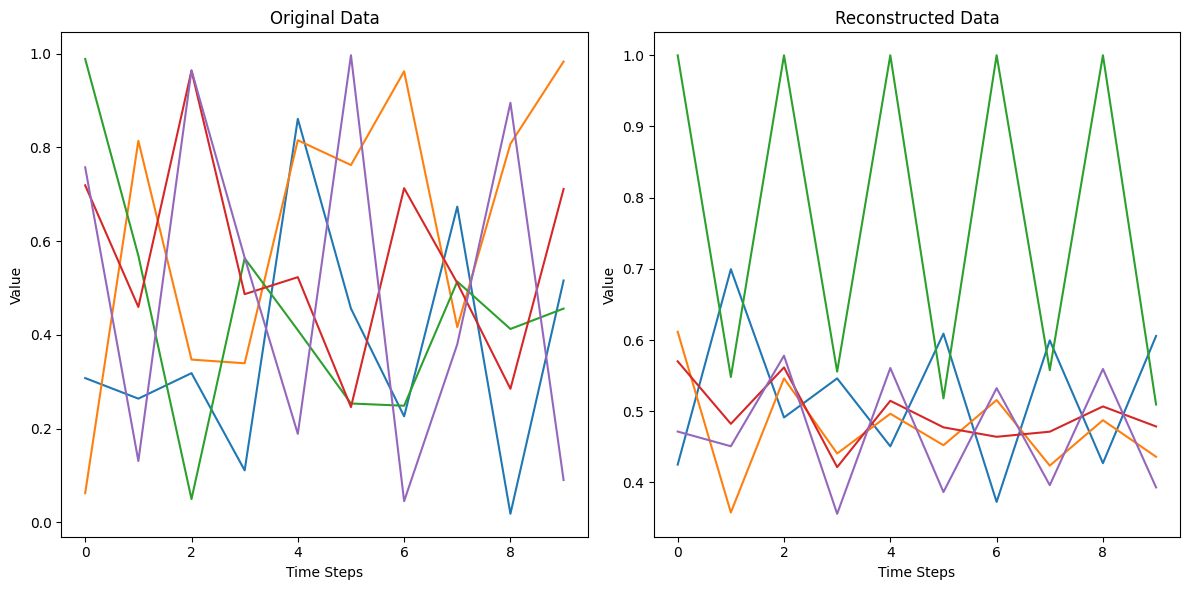

In [ ]:
import matplotlib.pyplot as plt

# 원본 데이터와 복원된 데이터의 차이 계산
def calculate_mse(original, reconstructed):
    return ((original - reconstructed) ** 2).mean()

# MSE 계산
mse = calculate_mse(test_tensor, reconstructed)
print(f'Mean Squared Error between original and reconstructed data: {mse:.4f}')

# 데이터 시각화
def plot_data(original, reconstructed, index=0):
    plt.figure(figsize=(12, 6))

    # 원본 데이터
    plt.subplot(1, 2, 1)
    plt.title("Original Data")
    plt.plot(original[index].numpy())
    plt.xlabel("Time Steps")
    plt.ylabel("Value")

    # 복원된 데이터
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Data")
    plt.plot(reconstructed[index].numpy())
    plt.xlabel("Time Steps")
    plt.ylabel("Value")

    plt.tight_layout()
    plt.show()

# 시각화 예시
plot_data(test_tensor, reconstructed)


# RNN + AE with GARCH for dynamic threshold

In [2]:
!pip install arch -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 4.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

# RNN AutoEncoder model class
class RNNAutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNAutoEncoder, self).__init__()
        self.encoder = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.decoder = nn.RNN(hidden_size, input_size, num_layers, batch_first=True)

    def forward(self, x):
        encoded, _ = self.encoder(x)
        decoded, _ = self.decoder(encoded)
        return decoded

# Load financial data
start_date = '2020-01-01'
end_date = '2024-01-01'
data = yf.download('^GSPC', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate returns
returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
x_data = returns.values.reshape(-1, 1)

# Prepare training data for RNN AutoEncoder
sequence_length = 10
train_sequences = []
for i in range(len(x_data) - sequence_length):
    train_sequences.append(x_data[i:i + sequence_length])
train_sequences = torch.tensor(train_sequences, dtype=torch.float32)

# Define model, loss, and optimizer
input_size = 1
hidden_size = 16
num_layers = 1
model = RNNAutoEncoder(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_sequences)
    loss = criterion(outputs, train_sequences)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

<ipython-input-4-eec501f6bec0>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  train_sequences = torch.tensor(train_sequences, dtype=torch.float32)


Epoch [10/50], Loss: 0.0041
Epoch [20/50], Loss: 0.0018
Epoch [30/50], Loss: 0.0007
Epoch [40/50], Loss: 0.0001
Epoch [50/50], Loss: 0.0001


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.259e-08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+04 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


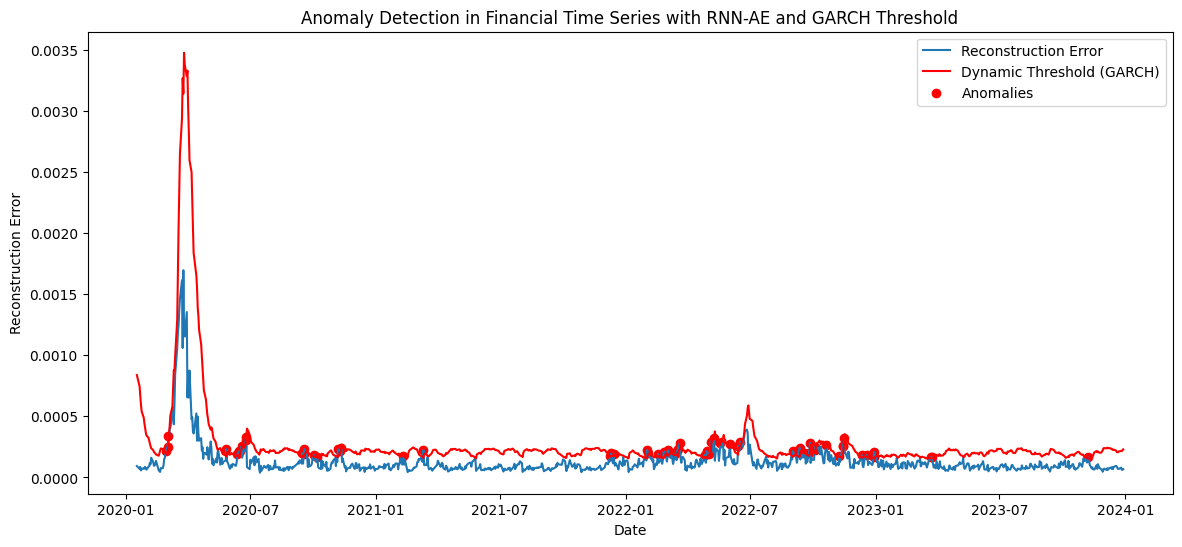

In [5]:
# Reconstruct sequences and calculate reconstruction error
model.eval()
with torch.no_grad():
    reconstructed = model(train_sequences).numpy()
reconstruction_errors = np.mean((train_sequences.numpy() - reconstructed) ** 2, axis=(1, 2))

# Fit GARCH model to calculate dynamic threshold
model_garch = arch_model(reconstruction_errors, vol='Garch', p=1, q=1)
results_garch = model_garch.fit(disp='off')

# Calculate dynamic thresholds
conditional_volatility = results_garch.conditional_volatility
threshold = conditional_volatility * 3  # Dynamic threshold based on volatility (3-sigma rule)

# Detect anomalies
anomalies = reconstruction_errors > threshold

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(returns.index[sequence_length:], reconstruction_errors, label='Reconstruction Error')
plt.plot(returns.index[sequence_length:], threshold, label='Dynamic Threshold (GARCH)', color='red')
plt.scatter(returns.index[sequence_length:][anomalies], reconstruction_errors[anomalies], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.title('Anomaly Detection in Financial Time Series with RNN-AE and GARCH Threshold')
plt.show()

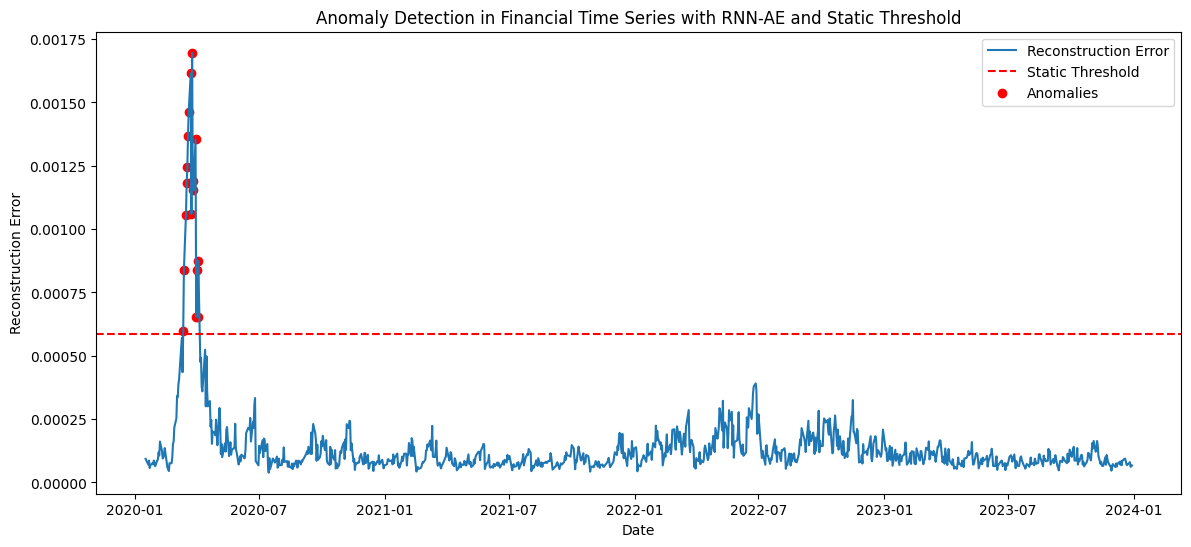

In [6]:
# Reconstruct sequences and calculate reconstruction error
model.eval()
with torch.no_grad():
    reconstructed = model(train_sequences).numpy()
reconstruction_errors = np.mean((train_sequences.numpy() - reconstructed) ** 2, axis=(1, 2))

# Set a fixed threshold for anomaly detection
threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)  # Static threshold (3-sigma rule)

# Detect anomalies
anomalies = reconstruction_errors > threshold

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(returns.index[sequence_length:], reconstruction_errors, label='Reconstruction Error')
plt.axhline(y=threshold, color='red', linestyle='--', label='Static Threshold')
plt.scatter(returns.index[sequence_length:][anomalies], reconstruction_errors[anomalies], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.title('Anomaly Detection in Financial Time Series with RNN-AE and Static Threshold')
plt.show()

Anomaly Detection: RNN + AE with GARCH for dynamic threshold (NAB Dataset)

In [7]:
!git clone https://github.com/numenta/NAB.git

Cloning into 'NAB'...
remote: Enumerating objects: 7035, done.
remote: Counting objects: 100% (629/629), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 7035 (delta 529), reused 478 (delta 478), pack-reused 6406 (from 1)
Receiving objects: 100% (7035/7035), 86.71 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (4952/4952), done.
Updating files: 100% (1186/1186), done.


In [61]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import os
from arch import arch_model
import matplotlib.pyplot as plt
import json
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score, confusion_matrix


# RNN AutoEncoder model class
class RNNAutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNAutoEncoder, self).__init__()
        self.encoder = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.decoder = nn.RNN(hidden_size, input_size, num_layers, batch_first=True)

    def forward(self, x):
        encoded, _ = self.encoder(x)
        decoded, _ = self.decoder(encoded)
        return decoded

# 데이터셋 경로 설정
data_dir = 'NAB/data/artificialWithAnomaly'

# 데이터 파일 선택
data_file = os.path.join(data_dir, 'art_daily_jumpsup.csv')

# 데이터 로드
df = pd.read_csv(data_file)

# 타임스탬프를 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 타임스탬프를 인덱스로 설정
df.set_index('timestamp', inplace=True)

# x_data 생성
x_data = df['value'].values.reshape(-1, 1)

In [63]:
# Prepare training data for RNN AutoEncoder
sequence_length = 10
train_sequences = []
for i in range(len(x_data) - sequence_length):
    train_sequences.append(x_data[i:i + sequence_length])
train_sequences = torch.tensor(train_sequences, dtype=torch.float32)

# Define model, loss, and optimizer
input_size = 1
hidden_size = 16
num_layers = 1
model = RNNAutoEncoder(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_sequences)
    loss = criterion(outputs, train_sequences)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}')

Epoch [10/100], Loss: 3114.777344
Epoch [20/100], Loss: 3073.993164
Epoch [30/100], Loss: 2995.730469
Epoch [40/100], Loss: 2962.877441
Epoch [50/100], Loss: 2952.796143
Epoch [60/100], Loss: 2950.637939
Epoch [70/100], Loss: 2950.291260
Epoch [80/100], Loss: 2950.180908
Epoch [90/100], Loss: 2950.120850
Epoch [100/100], Loss: 2950.074707


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004427. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


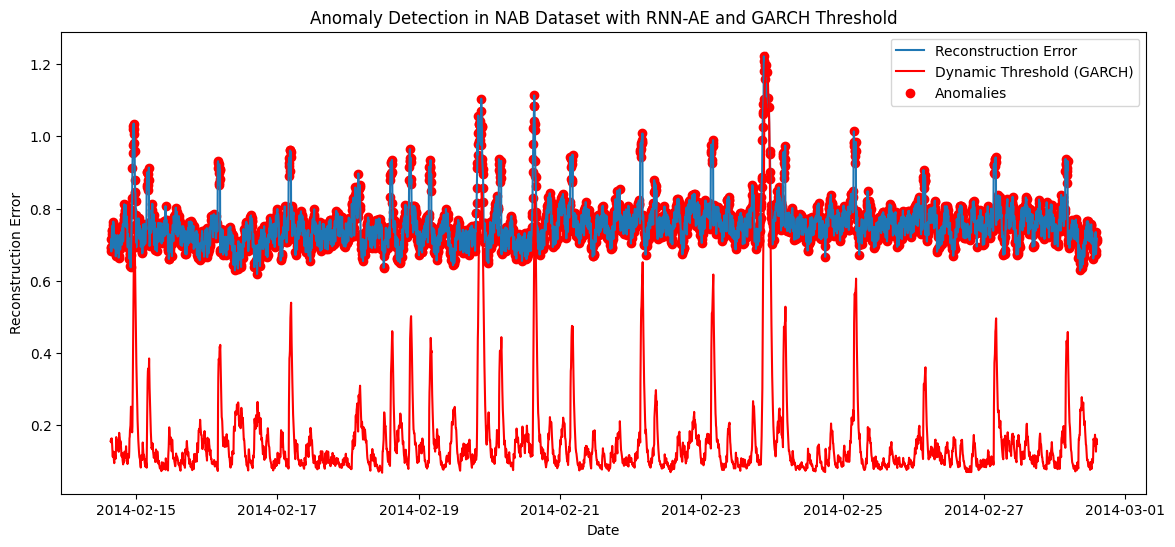

In [53]:
# Reconstruct sequences and calculate reconstruction error
model.eval()
with torch.no_grad():
    reconstructed = model(train_sequences).numpy()
reconstruction_errors = np.mean((train_sequences.numpy() - reconstructed) ** 2, axis=(1, 2))

# Fit GARCH model to calculate dynamic threshold
model_garch = arch_model(reconstruction_errors, vol='Garch', p=1, q=1)
results_garch = model_garch.fit(disp='off')

# Calculate dynamic thresholds
conditional_volatility = results_garch.conditional_volatility
threshold = conditional_volatility * 3  # Dynamic threshold based on volatility (3-sigma rule)

# Detect anomalies
anomalies = reconstruction_errors > threshold

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(df.index[sequence_length:], reconstruction_errors, label='Reconstruction Error')
plt.plot(df.index[sequence_length:], threshold, label='Dynamic Threshold (GARCH)', color='red')
plt.scatter(df.index[sequence_length:][anomalies], reconstruction_errors[anomalies], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.title('Anomaly Detection in NAB Dataset with RNN-AE and GARCH Threshold')
plt.show()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004427. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004427. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

GARCH(1, 1) - Precision: 0.0968, Recall: 0.9652, F1-score: 0.1760
GARCH(1, 2) - Precision: 0.0975, Recall: 0.9726, F1-score: 0.1772
GARCH(1, 3) - Precision: 0.0982, Recall: 0.9801, F1-score: 0.1784
GARCH(2, 1) - Precision: 0.0966, Recall: 0.9627, F1-score: 0.1756
GARCH(2, 2) - Precision: 0.0973, Recall: 0.9701, F1-score: 0.1768
GARCH(2, 3) - Precision: 0.0979, Recall: 0.9776, F1-score: 0.1780
GARCH(3, 1) - Precision: 0.0959, Recall: 0.9552, F1-score: 0.1743
GARCH(3, 2) - Precision: 0.0968, Recall: 0.9652, F1-score: 0.1760
GARCH(3, 3) - Precision: 0.0973, Recall: 0.9701, F1-score: 0.1768

Best F1-score:
GARCH(1.0, 3.0) with F1-score = 0.1784

Best Recall:
GARCH(1.0, 3.0) with Recall = 0.9801


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004427. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004427. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

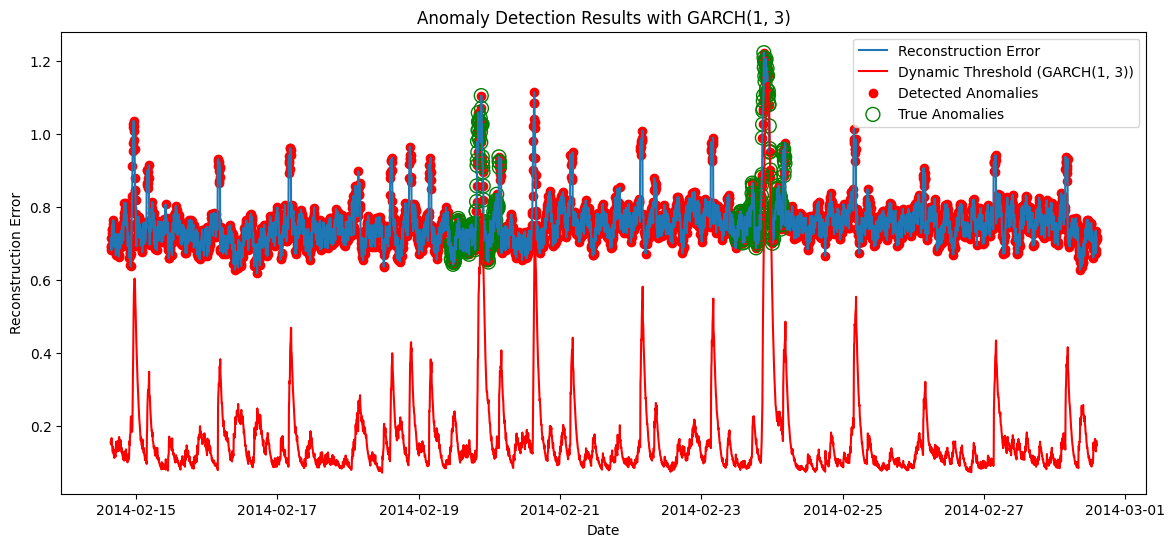

In [54]:
# Reconstruct sequences and calculate reconstruction error
model.eval()
with torch.no_grad():
    reconstructed = model(train_sequences).numpy()
reconstruction_errors = np.mean((train_sequences.numpy() - reconstructed) ** 2, axis=(1, 2))

# 이상치 레이블 로드
labels_file = 'NAB/labels/combined_windows.json'

with open(labels_file, 'r') as f:
    labels = json.load(f)

# 현재 데이터 파일의 상대 경로
data_file_relative = os.path.relpath(data_file, start='NAB/data')

# 해당 데이터 파일의 이상치 구간 가져오기
anomaly_windows = labels.get(data_file_relative, [])

# 이상치 레이블 생성
true_anomalies = np.zeros(len(reconstruction_errors), dtype=bool)
time_index = df.index[sequence_length:].to_pydatetime()

for window in anomaly_windows:
    start = pd.to_datetime(window[0])
    end = pd.to_datetime(window[1])
    mask = (time_index >= start) & (time_index <= end)
    true_anomalies |= mask

# GARCH 모델에서 테스트할 p와 q의 조합 설정
p_values = [1, 2, 3]
q_values = [1, 2, 3]

# 결과 저장을 위한 리스트 초기화
results = []

from arch import arch_model

# 모든 p, q 조합에 대해 반복
for p in p_values:
    for q in q_values:
        try:
            # GARCH 모델 적합
            model_garch = arch_model(reconstruction_errors, vol='Garch', p=p, q=q)
            results_garch = model_garch.fit(disp='off')

            # 동적 임계값 계산
            conditional_volatility = results_garch.conditional_volatility
            threshold = conditional_volatility * 3  # Dynamic threshold based on volatility (3-sigma rule)

            # 이상치 탐지
            anomalies = reconstruction_errors > threshold

            # 성능 평가
            precision = precision_score(true_anomalies, anomalies, zero_division=0)
            recall = recall_score(true_anomalies, anomalies, zero_division=0)
            f1 = f1_score(true_anomalies, anomalies, zero_division=0)

            # 결과 저장
            results.append({
                'p': p,
                'q': q,
                'precision': precision,
                'recall': recall,
                'f1_score': f1
            })

            print(f'GARCH({p}, {q}) - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')

        except Exception as e:
            print(f'GARCH({p}, {q}) - Error fitting model: {e}')

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# F1 스코어가 가장 높은 조합 찾기
best_f1 = results_df.loc[results_df['f1_score'].idxmax()]
print(f"\nBest F1-score:\nGARCH({best_f1['p']}, {best_f1['q']}) with F1-score = {best_f1['f1_score']:.4f}")

# 재현율이 가장 높은 조합 찾기
best_recall = results_df.loc[results_df['recall'].idxmax()]
print(f"\nBest Recall:\nGARCH({best_recall['p']}, {best_recall['q']}) with Recall = {best_recall['recall']:.4f}")

# 최상의 F1 스코어를 가진 모델의 결과 시각화

# 최상의 (p, q)로 다시 모델 적합 및 결과 시각화
p_optimal = int(best_f1['p'])
q_optimal = int(best_f1['q'])

model_garch = arch_model(reconstruction_errors, vol='Garch', p=p_optimal, q=q_optimal)
results_garch = model_garch.fit(disp='off')

# 동적 임계값 계산
conditional_volatility = results_garch.conditional_volatility
threshold = conditional_volatility * 3  # Dynamic threshold based on volatility (3-sigma rule)

# 이상치 탐지
anomalies = reconstruction_errors > threshold

# 결과 시각화
plt.figure(figsize=(14, 6))
plt.plot(df.index[sequence_length:], reconstruction_errors, label='Reconstruction Error')
plt.plot(df.index[sequence_length:], threshold, label=f'Dynamic Threshold (GARCH({p_optimal}, {q_optimal}))', color='red')
plt.scatter(df.index[sequence_length:][anomalies], reconstruction_errors[anomalies], color='red', label='Detected Anomalies')
plt.scatter(df.index[sequence_length:][true_anomalies], reconstruction_errors[true_anomalies], facecolors='none', edgecolors='green', label='True Anomalies', s=100)
plt.xlabel('Date')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.title(f'Anomaly Detection Results with GARCH({p_optimal}, {q_optimal})')
plt.show()

Precision: 0.1439
Recall: 0.0498
F1-score: 0.0739


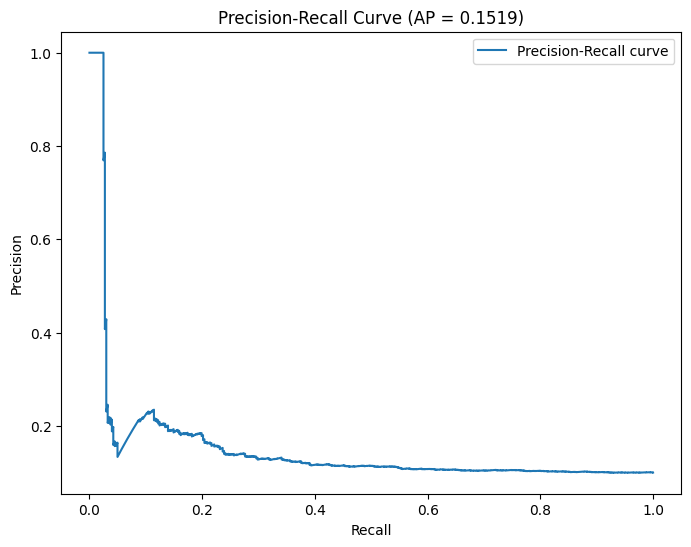

Confusion Matrix:
[[3501  119]
 [ 382   20]]
True Negatives (TN): 3501
False Positives (FP): 119
False Negatives (FN): 382
True Positives (TP): 20


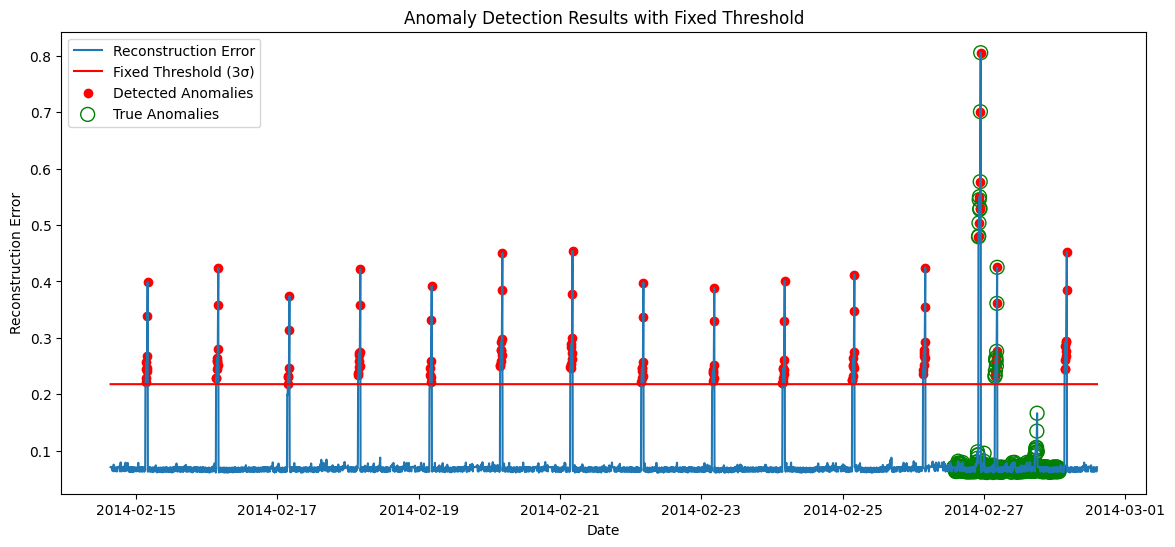

In [17]:
# Reconstruct sequences and calculate reconstruction error
model.eval()
with torch.no_grad():
    reconstructed = model(train_sequences).numpy()
reconstruction_errors = np.mean((train_sequences.numpy() - reconstructed) ** 2, axis=(1, 2))

# *** 고정 임계값 계산 ***
mean_error = np.mean(reconstruction_errors)
std_error = np.std(reconstruction_errors)
n_sigma = 3  # 임계값 기준 (예: 3 시그마)

# 고정 임계값 설정
threshold = mean_error + n_sigma * std_error

# 임계값을 배열로 변환하여 그래프에서 사용
threshold_array = np.full_like(reconstruction_errors, threshold)

# Detect anomalies
anomalies = reconstruction_errors > threshold

# 이상치 레이블 로드
labels_file = 'NAB/labels/combined_windows.json'

with open(labels_file, 'r') as f:
    labels = json.load(f)

# 현재 데이터 파일의 상대 경로
data_file_relative = os.path.relpath(data_file, start='NAB/data')

# 해당 데이터 파일의 이상치 구간 가져오기
anomaly_windows = labels.get(data_file_relative, [])

# 이상치 레이블 생성
true_anomalies = np.zeros(len(reconstruction_errors), dtype=bool)
time_index = df.index[sequence_length:].to_pydatetime()

for window in anomaly_windows:
    start = pd.to_datetime(window[0])
    end = pd.to_datetime(window[1])
    mask = (time_index >= start) & (time_index <= end)
    true_anomalies |= mask

# 성능 평가
precision = precision_score(true_anomalies, anomalies)
recall = recall_score(true_anomalies, anomalies)
f1 = f1_score(true_anomalies, anomalies)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# PR 곡선 그리기
scores = reconstruction_errors

precision_vals, recall_vals, thresholds_pr = precision_recall_curve(true_anomalies, scores)
avg_precision = average_precision_score(true_anomalies, scores)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {avg_precision:.4f})')
plt.legend()
plt.show()

# 혼동 행렬 출력
cm = confusion_matrix(true_anomalies, anomalies)
tn, fp, fn, tp = cm.ravel()

print('Confusion Matrix:')
print(cm)
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')
print(f'True Positives (TP): {tp}')

# 결과 시각화
plt.figure(figsize=(14, 6))
plt.plot(df.index[sequence_length:], reconstruction_errors, label='Reconstruction Error')
plt.plot(df.index[sequence_length:], threshold_array, label=f'Fixed Threshold ({n_sigma}σ)', color='red')
plt.scatter(df.index[sequence_length:][anomalies], reconstruction_errors[anomalies], color='red', label='Detected Anomalies')
plt.scatter(df.index[sequence_length:][true_anomalies], reconstruction_errors[true_anomalies], facecolors='none', edgecolors='green', label='True Anomalies', s=100)
plt.xlabel('Date')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.title('Anomaly Detection Results with Fixed Threshold')
plt.show()

# LSTM

Epoch [10/50], Loss: 0.002709
Epoch [20/50], Loss: 0.002160
Epoch [30/50], Loss: 0.001368
Epoch [40/50], Loss: 0.000534
Epoch [50/50], Loss: 0.000092


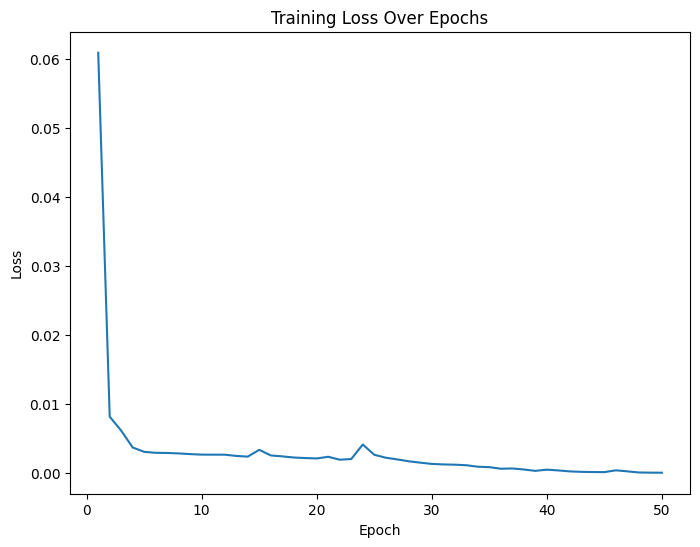

In [83]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import os
from arch import arch_model
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset

# Bidirectional LSTM AutoEncoder model class
class BiLSTMAutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BiLSTMAutoEncoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.decoder = nn.LSTM(hidden_size * 2, hidden_size * 2, num_layers, batch_first=True, bidirectional=True)
        self.output_layer = nn.Linear(hidden_size * 4, input_size)  # 추가된 선형 계층

    def forward(self, x):
        # 인코더
        _, (hidden, _) = self.encoder(x)
        # hidden의 형태: (num_layers * num_directions, batch, hidden_size)
        # 두 방향의 은닉 상태를 결합
        hidden = hidden.view(self.num_layers, 2, x.size(0), self.hidden_size)
        hidden = torch.cat((hidden[:,0,:,:], hidden[:,1,:,:]), dim=2)
        # 디코더 입력 준비
        decoder_input = hidden.repeat(x.size(1), 1, 1).permute(1, 0, 2)
        # 디코더
        decoded, _ = self.decoder(decoder_input)
        # 출력 차원 조정
        decoded = decoded.reshape(decoded.size(0), decoded.size(1), -1)
        output = self.output_layer(decoded)
        return output

# -------------------------------
# 1. 학습 데이터 로드 및 전처리
# -------------------------------

# 학습 데이터셋 경로 설정
train_data_dir = 'NAB/data/artificialNoAnomaly'

# 학습 데이터 파일 선택 (예: art_daily_no_noise.csv)
train_data_file = os.path.join(train_data_dir, 'art_daily_no_noise.csv')

# 학습 데이터 로드
df_train = pd.read_csv(train_data_file)

# 타임스탬프를 datetime 형식으로 변환
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])

# 타임스탬프를 인덱스로 설정
df_train.set_index('timestamp', inplace=True)

# x_train 생성 및 정규화
x_train = df_train['value'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# 시퀀스 생성
sequence_length = 10
train_sequences = []
for i in range(len(x_train) - sequence_length):
    train_sequences.append(x_train[i:i + sequence_length])

# 텐서로 변환
train_sequences = torch.tensor(train_sequences, dtype=torch.float32)

# TensorDataset과 DataLoader 생성
batch_size = 64
train_dataset = TensorDataset(train_sequences)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# -------------------------------
# 2. 모델 정의 및 학습
# -------------------------------

# 모델 정의
input_size = 1
hidden_size = 64  # hidden_size를 늘림
num_layers = 1
model = BiLSTMAutoEncoder(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델을 GPU로 이동 (가능한 경우)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 학습 루프
num_epochs = 50
loss_list = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in train_loader:
        batch_sequences = batch[0].to(device)
        outputs = model(batch_sequences)
        loss = criterion(outputs, batch_sequences)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    loss_list.append(avg_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.6f}')

# 학습 손실 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

Scaled Reconstruction Errors Mean: 0.1911432147026062
GARCH(1, 1) - Precision: 0.9889, Recall: 0.2208, F1-score: 0.3611
GARCH(1, 2) - Precision: 0.9342, Recall: 0.1762, F1-score: 0.2965
GARCH(1, 3) - Precision: 0.9828, Recall: 0.2829, F1-score: 0.4393
GARCH(1, 4) - Precision: 0.9912, Recall: 0.2804, F1-score: 0.4371
GARCH(2, 1) - Precision: 0.9726, Recall: 0.1762, F1-score: 0.2983
GARCH(2, 2) - Precision: 0.9890, Recall: 0.2233, F1-score: 0.3644
GARCH(2, 3) - Precision: 0.9688, Recall: 0.0769, F1-score: 0.1425
GARCH(2, 4) - Precision: 0.9773, Recall: 0.2134, F1-score: 0.3503
GARCH(3, 1) - Precision: 0.9435, Recall: 0.2903, F1-score: 0.4440
GARCH(3, 2) - Precision: 0.9741, Recall: 0.2804, F1-score: 0.4355
GARCH(3, 3) - Precision: 0.9221, Recall: 0.1762, F1-score: 0.2958
GARCH(3, 4) - Precision: 1.0000, Recall: 0.2854, F1-score: 0.4440
GARCH(4, 1) - Precision: 0.9474, Recall: 0.2680, F1-score: 0.4178
GARCH(4, 2) - Precision: 0.9767, Recall: 0.2084, F1-score: 0.3436
GARCH(4, 3) - Precisio

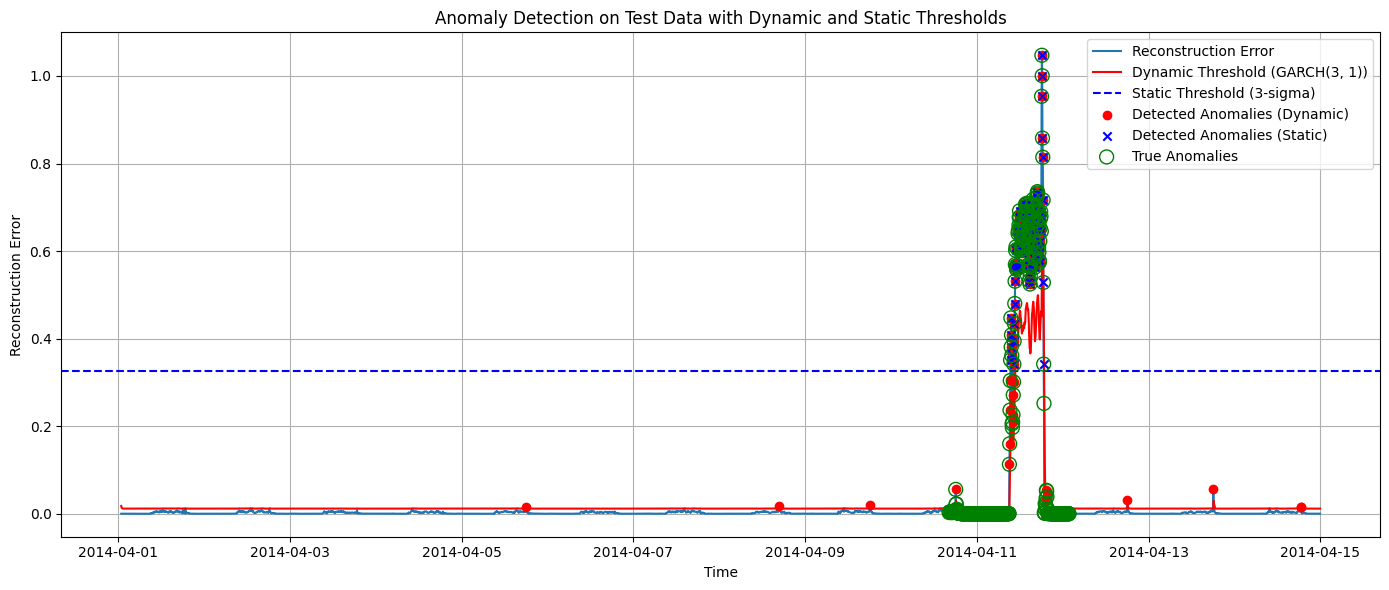

In [114]:
# -------------------------------
# 3. 테스트 데이터 로드 및 전처리
# -------------------------------

# 테스트 데이터셋 경로 설정
test_data_dir = 'NAB/data/artificialWithAnomaly'

# 테스트 데이터 파일 선택 (예: art_daily_jumpsup.csv)
test_data_file = os.path.join(test_data_dir, 'art_daily_jumpsup.csv')

# 테스트 데이터 로드
df_test = pd.read_csv(test_data_file)

# 타임스탬프를 datetime 형식으로 변환
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'])

# 타임스탬프를 인덱스로 설정
df_test.set_index('timestamp', inplace=True)

# x_test 생성 및 정규화 (학습 시 사용한 스케일러 사용)
x_test = df_test['value'].values.reshape(-1, 1)
x_test = scaler.transform(x_test)

# 시퀀스 생성
test_sequences = []
for i in range(len(x_test) - sequence_length):
    test_sequences.append(x_test[i:i + sequence_length])

# 텐서로 변환
test_sequences = torch.tensor(test_sequences, dtype=torch.float32)

# TensorDataset과 DataLoader 생성
test_dataset = TensorDataset(test_sequences)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# -------------------------------
# 4. 모델 테스트 및 이상치 탐지
# -------------------------------

# Reconstruct sequences and calculate reconstruction error
model.eval()
with torch.no_grad():
    reconstructed = []
    for batch in test_loader:
        batch_sequences = batch[0].to(device)
        outputs = model(batch_sequences)
        reconstructed.extend(outputs.cpu().numpy())
reconstructed = np.array(reconstructed)
test_sequences_np = test_sequences.numpy()
reconstruction_errors = np.mean((test_sequences_np - reconstructed) ** 2, axis=(1, 2))

# -------------------------------
# 5. 이상치 레이블 로드
# -------------------------------

# 이상치 레이블 로드
labels_file = 'NAB/labels/combined_windows.json'

with open(labels_file, 'r') as f:
    labels = json.load(f)

# 현재 테스트 데이터 파일의 상대 경로
test_data_file_relative = os.path.relpath(test_data_file, start='NAB/data')

# 해당 데이터 파일의 이상치 구간 가져오기
anomaly_windows = labels.get(test_data_file_relative, [])

# 이상치 레이블 생성
true_anomalies = np.zeros(len(reconstruction_errors), dtype=bool)
time_index = df_test.index[sequence_length:].to_pydatetime()

for window in anomaly_windows:
    start = pd.to_datetime(window[0])
    end = pd.to_datetime(window[1])
    mask = (time_index >= start) & (time_index <= end)
    true_anomalies |= mask

# -------------------------------
# 6. GARCH 모델을 사용한 동적 임계값 적용
# -------------------------------

from arch import arch_model

# 재구성 오류 스케일링 (GARCH 모델의 수렴을 돕기 위해)
scaling_factor = 10
reconstruction_errors_scaled = reconstruction_errors * scaling_factor

# 데이터 스케일 확인
print(f"Scaled Reconstruction Errors Mean: {np.mean(reconstruction_errors_scaled)}")

# GARCH 모델에서 테스트할 p와 q의 조합 설정
p_values = [1, 2, 3, 4]
q_values = [1, 2, 3, 4]

# 결과 저장을 위한 리스트 초기화
results = []

# 모든 p, q 조합에 대해 반복
for p in p_values:
    for q in q_values:
        try:
            # GARCH 모델 적합
            model_garch = arch_model(reconstruction_errors_scaled, vol='Garch', p=p, q=q)
            results_garch = model_garch.fit(disp='off', show_warning=False)

            # 동적 임계값 계산
            conditional_volatility = results_garch.conditional_volatility
            threshold = conditional_volatility * 1 # Dynamic threshold (3-sigma rule)
            threshold = threshold / scaling_factor  # 임계값을 원래 스케일로 변환

            # 이상치 탐지
            anomalies = reconstruction_errors > threshold

            # 성능 평가
            precision = precision_score(true_anomalies, anomalies, zero_division=0)
            recall = recall_score(true_anomalies, anomalies, zero_division=0)
            f1 = f1_score(true_anomalies, anomalies, zero_division=0)

            # 결과 저장
            results.append({
                'p': p,
                'q': q,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'threshold': threshold,
                'anomalies': anomalies
            })

            print(f'GARCH({p}, {q}) - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')

        except Exception as e:
            print(f'GARCH({p}, {q}) - Error fitting model: {e}')

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# Recall이 가장 높은 조합 찾기
best_recall = results_df.loc[results_df['recall'].idxmax()]
print(f"\nBest Recall:\nGARCH({int(best_recall['p'])}, {int(best_recall['q'])}) with Recall = {best_recall['recall']:.4f}")

# 최적의 p, q 값 설정
p_optimal = int(best_recall['p'])
q_optimal = int(best_recall['q'])
threshold_optimal = best_recall['threshold']
anomalies_optimal = best_recall['anomalies']

# -------------------------------
# 7. 최적의 GARCH 모델로 이상치 탐지 및 성능 평가
# -------------------------------

# 성능 평가
precision = precision_score(true_anomalies, anomalies_optimal, zero_division=0)
recall = recall_score(true_anomalies, anomalies_optimal, zero_division=0)
f1 = f1_score(true_anomalies, anomalies_optimal, zero_division=0)

print(f'\nFinal Performance with GARCH({p_optimal}, {q_optimal}):')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# 혼동 행렬 출력
cm = confusion_matrix(true_anomalies, anomalies_optimal)
tn, fp, fn, tp = cm.ravel()

print('Confusion Matrix:')
print(cm)
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')
print(f'True Positives (TP): {tp}')

# -------------------------------
# 8. 결과 시각화 (동적 임계값 + 정적 임계값)
# -------------------------------

# 정적 임계값 계산 (3-sigma 규칙)
static_threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)

# 이상치 탐지 (정적 임계값 기준)
anomalies_static = reconstruction_errors > static_threshold

# 성능 평가 for dynamic threshold
precision_dynamic = precision_score(true_anomalies, anomalies_optimal, zero_division=0)
recall_dynamic = recall_score(true_anomalies, anomalies_optimal, zero_division=0)
f1_dynamic = f1_score(true_anomalies, anomalies_optimal, zero_division=0)

print(f'\nPerformance with Dynamic Threshold (GARCH({p_optimal}, {q_optimal})):')
print(f'Precision: {precision_dynamic:.4f}')
print(f'Recall: {recall_dynamic:.4f}')
print(f'F1-score: {f1_dynamic:.4f}')

# 성능 평가 for static threshold
precision_static = precision_score(true_anomalies, anomalies_static, zero_division=0)
recall_static = recall_score(true_anomalies, anomalies_static, zero_division=0)
f1_static = f1_score(true_anomalies, anomalies_static, zero_division=0)

print(f'\nPerformance with Static Threshold (3-sigma):')
print(f'Precision: {precision_static:.4f}')
print(f'Recall: {recall_static:.4f}')
print(f'F1-score: {f1_static:.4f}')
print()

# 혼동 행렬 for dynamic threshold
cm_dynamic = confusion_matrix(true_anomalies, anomalies_optimal)
if cm_dynamic.size == 4:
    tn, fp, fn, tp = cm_dynamic.ravel()
    print('Confusion Matrix (Dynamic):')
    print(cm_dynamic)
    print(f'True Negatives (TN): {tn}')
    print(f'False Positives (FP): {fp}')
    print(f'False Negatives (FN): {fn}')
    print(f'True Positives (TP): {tp}')
else:
    print('Confusion Matrix (Dynamic):')
    print(cm_dynamic)

# 혼동 행렬 for static threshold
cm_static = confusion_matrix(true_anomalies, anomalies_static)
if cm_static.size == 4:
    tn, fp, fn, tp = cm_static.ravel()
    print('Confusion Matrix (Static):')
    print(cm_static)
    print(f'True Negatives (TN): {tn}')
    print(f'False Positives (FP): {fp}')
    print(f'False Negatives (FN): {fn}')
    print(f'True Positives (TP): {tp}')
else:
    print('Confusion Matrix (Static):')
    print(cm_static)

# 결과 시각화
plt.figure(figsize=(14, 6))

# 재구성 오류 플롯
plt.plot(df_test.index[sequence_length:], reconstruction_errors, label='Reconstruction Error')

# 동적 임계값 플롯 (GARCH 기반)
plt.plot(df_test.index[sequence_length:], threshold_optimal,
         label=f'Dynamic Threshold (GARCH({p_optimal}, {q_optimal}))', color='red')

# 정적 임계값 플롯 (3-sigma 규칙)
plt.axhline(y=static_threshold, color='blue', linestyle='--',
            label='Static Threshold (3-sigma)')

# 탐지된 이상치 표시 (동적 임계값 기준)
plt.scatter(df_test.index[sequence_length:][anomalies_optimal],
            reconstruction_errors[anomalies_optimal],
            color='red', label='Detected Anomalies (Dynamic)', zorder=5)

# 탐지된 이상치 표시 (정적 임계값 기준)
plt.scatter(df_test.index[sequence_length:][anomalies_static],
            reconstruction_errors[anomalies_static],
            color='blue', marker='x', label='Detected Anomalies (Static)', zorder=5)

# 실제 이상치 표시
plt.scatter(df_test.index[sequence_length:][true_anomalies],
            reconstruction_errors[true_anomalies],
            facecolors='none', edgecolors='green',
            label='True Anomalies', s=100, zorder=5)

# 플롯 설정
plt.xlabel('Time')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection on Test Data with Dynamic and Static Thresholds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
